In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('/Users/rahulsinha/Downloads/loan.csv', low_memory=False)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
import pandas as pd
import numpy as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analyze default rates by any category
def analyze_category(df, column_name):
    # Calculate total counts and default rates
    analysis = df.groupby(column_name)['loan_status'].value_counts(normalize=True).unstack()
    
    # Add count of loans in each category
    analysis['total_count'] = df[column_name].value_counts()
    
    # Sort by Charged Off rate (bad customers)
    analysis = analysis.sort_values(by='Charged Off', ascending=False)
    
    return analysis


grade_analysis = analyze_category(df, 'grade')
print("\nLoan Grade Analysis:")
print(grade_analysis)


Loan Grade Analysis:
loan_status  Charged Off   Current  Fully Paid  total_count
grade                                                      
G               0.319620  0.053797    0.626582          316
F               0.304099  0.069590    0.626311         1049
E               0.251583  0.062984    0.685433         2842
D               0.210665  0.041832    0.747503         5307
C               0.166337  0.032601    0.801062         8098
B               0.118552  0.028702    0.852745        12020
A               0.059693  0.003966    0.936341        10085


In [8]:
purpose_analysis = analyze_category(df, 'purpose')
print("\nLoan Purpose Analysis:")
print(purpose_analysis)


Loan Purpose Analysis:
loan_status         Charged Off   Current  Fully Paid  total_count
purpose                                                           
small_business         0.259847  0.040481    0.699672         1828
renewable_energy       0.184466  0.009709    0.805825          103
educational            0.172308       NaN    0.827692          325
other                  0.158527  0.032056    0.809416         3993
moving                 0.157804  0.012007    0.830189          583
house                  0.154856  0.036745    0.808399          381
medical                0.152958  0.017316    0.829726          693
debt_consolidation     0.148436  0.031436    0.820128        18641
vacation               0.139108  0.015748    0.845144          381
home_improvement       0.116599  0.033938    0.849462         2976
credit_card            0.105653  0.020078    0.874269         5130
car                    0.103292  0.032279    0.864429         1549
major_purchase         0.101509  0.016

In [9]:
home_analysis = analyze_category(df, 'home_ownership')
print("\nHome Ownership Analysis:")
print(home_analysis)


Home Ownership Analysis:
loan_status     Charged Off   Current  Fully Paid  total_count
home_ownership                                                
OTHER              0.183673       NaN    0.816327           98
RENT               0.150220  0.022170    0.827610        18899
OWN                0.144866  0.027142    0.827992         3058
MORTGAGE           0.131774  0.036129    0.832097        17659
NONE                    NaN       NaN    1.000000            3


In [10]:
emp_analysis = analyze_category(df, 'emp_length')
print("\nEmployment Length Analysis:")
print(emp_analysis)


Employment Length Analysis:
loan_status  Charged Off   Current  Fully Paid  total_count
emp_length                                                 
10+ years       0.149904  0.044036    0.806059         8879
7 years         0.148336  0.034969    0.816695         1773
1 year          0.140741  0.021914    0.837346         3240
5 years         0.139549  0.026813    0.833638         3282
< 1 year        0.139428  0.016365    0.844207         4583
6 years         0.137730  0.027367    0.834904         2229
8 years         0.137255  0.029750    0.832995         1479
3 years         0.135531  0.020269    0.844200         4095
4 years         0.134459  0.027357    0.838184         3436
2 years         0.129216  0.022106    0.848678         4388
9 years         0.125596  0.025437    0.848967         1258



Loan Status Distribution:

Counts:
Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Percentages:
Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: loan_status, dtype: float64 %

Default Analysis by grade:
loan_status  Charged Off  Current  Fully Paid  total_count
grade                                                     
A                   5.97     0.40       93.63      1008500
B                  11.86     2.87       85.27      1202000
C                  16.63     3.26       80.11       809800
D                  21.07     4.18       74.75       530700
E                  25.16     6.30       68.54       284200
F                  30.41     6.96       62.63       104900
G                  31.96     5.38       62.66        31600 %


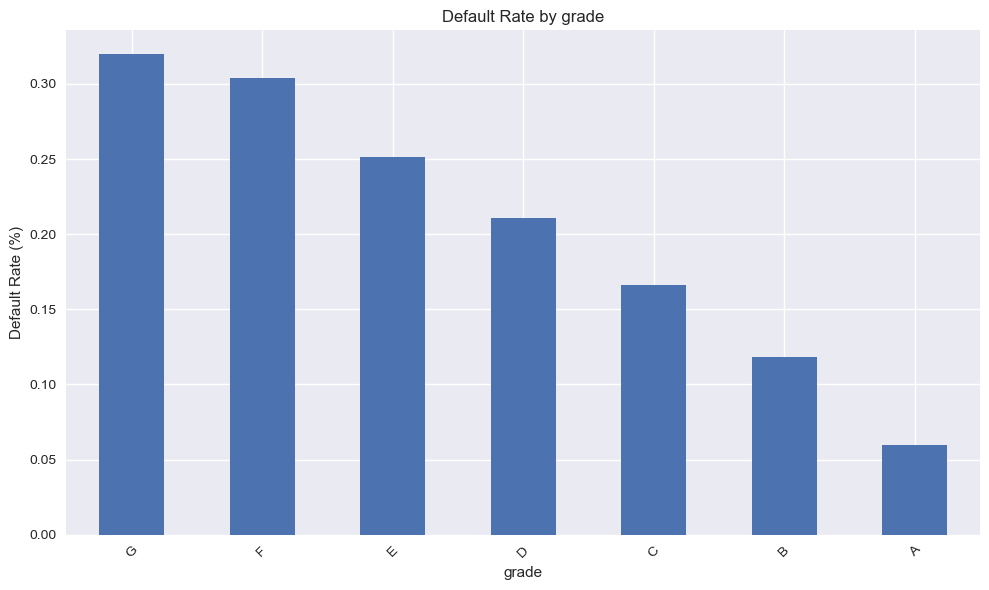


Default Analysis by home_ownership:
loan_status     Charged Off  Current  Fully Paid  total_count
home_ownership                                               
MORTGAGE              13.18     3.61       83.21      1765900
NONE                    NaN      NaN      100.00          300
OTHER                 18.37      NaN       81.63         9800
OWN                   14.49     2.71       82.80       305800
RENT                  15.02     2.22       82.76      1889900 %


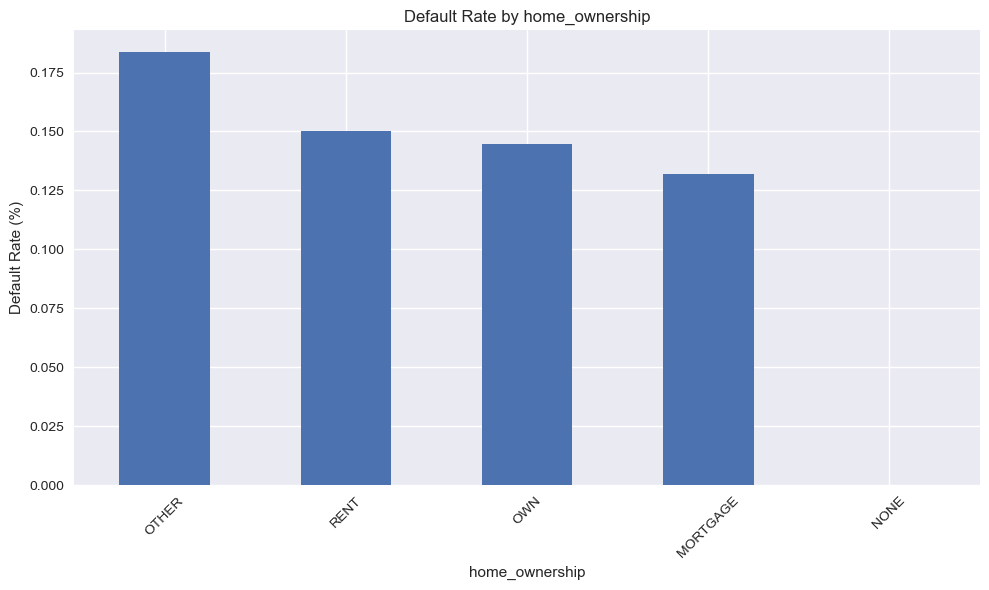


Default Analysis by purpose:
loan_status         Charged Off  Current  Fully Paid  total_count
purpose                                                          
car                       10.33     3.23       86.44       154900
credit_card               10.57     2.01       87.43       513000
debt_consolidation        14.84     3.14       82.01      1864100
educational               17.23      NaN       82.77        32500
home_improvement          11.66     3.39       84.95       297600
house                     15.49     3.67       80.84        38100
major_purchase            10.15     1.69       88.16       218700
medical                   15.30     1.73       82.97        69300
moving                    15.78     1.20       83.02        58300
other                     15.85     3.21       80.94       399300
renewable_energy          18.45     0.97       80.58        10300
small_business            25.98     4.05       69.97       182800
vacation                  13.91     1.57      

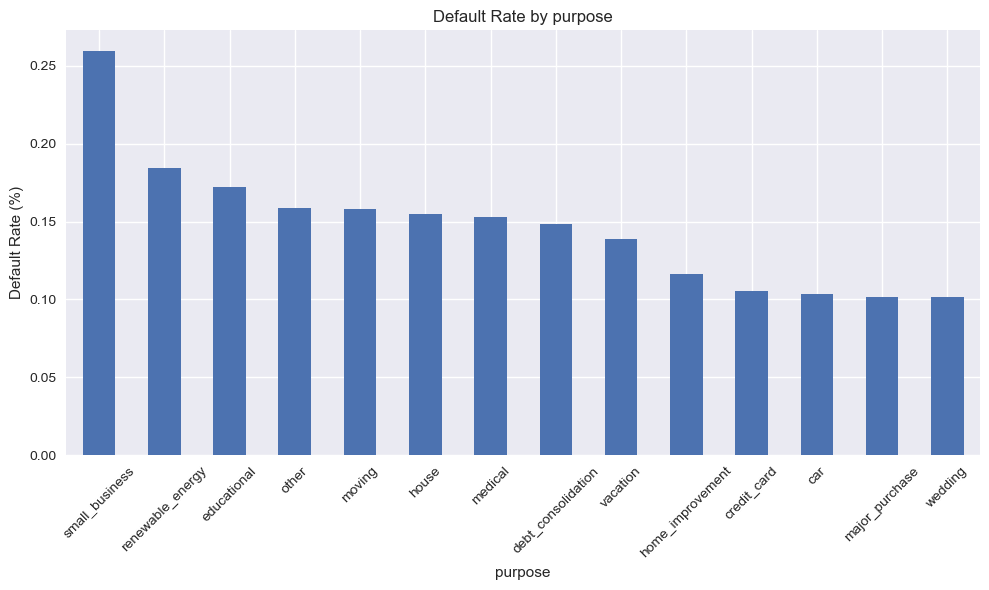


Default Analysis by emp_length:
loan_status  Charged Off  Current  Fully Paid  total_count
emp_length                                                
1 year             14.07     2.19       83.73       324000
10+ years          14.99     4.40       80.61       887900
2 years            12.92     2.21       84.87       438800
3 years            13.55     2.03       84.42       409500
4 years            13.45     2.74       83.82       343600
5 years            13.95     2.68       83.36       328200
6 years            13.77     2.74       83.49       222900
7 years            14.83     3.50       81.67       177300
8 years            13.73     2.97       83.30       147900
9 years            12.56     2.54       84.90       125800
< 1 year           13.94     1.64       84.42       458300 %


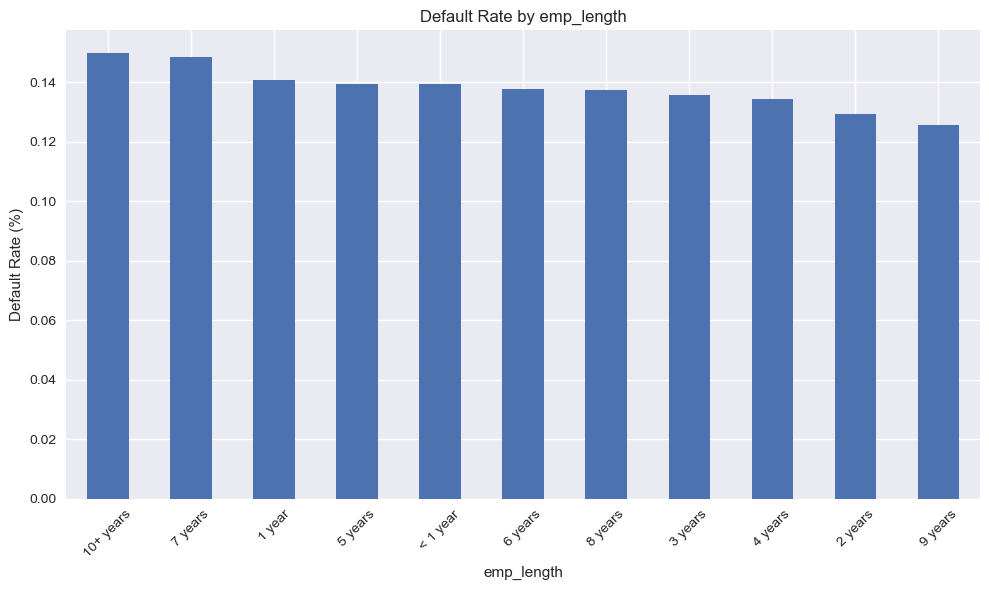


Default Analysis by verification_status:
loan_status          Charged Off  Current  Fully Paid  total_count
verification_status                                               
Not Verified               12.66     1.34       86.00      1692100
Source Verified            14.36     3.10       82.54       998700
Verified                   16.01     4.71       79.28      1280900 %


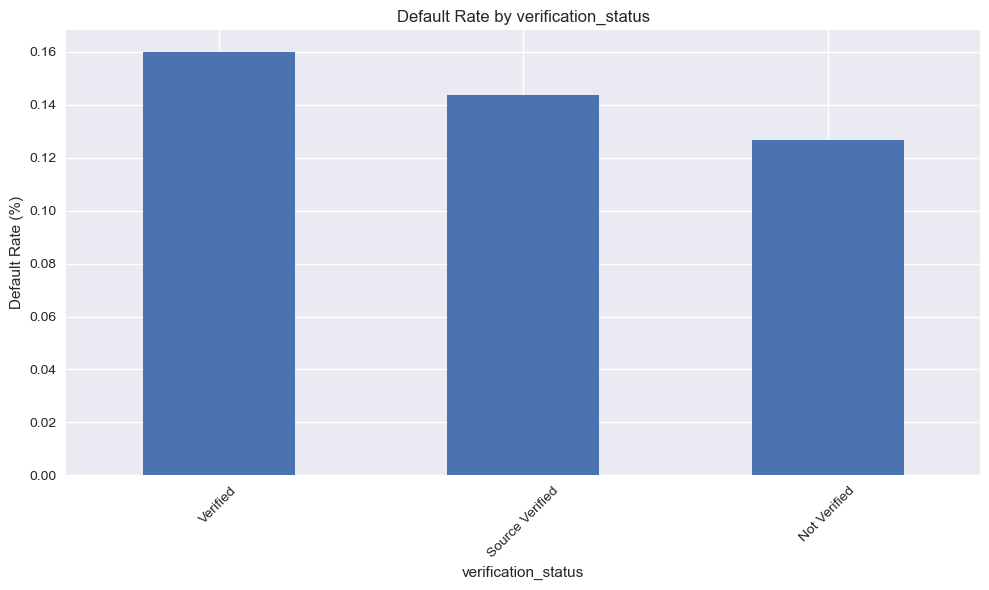


Default Analysis by term:
loan_status  Charged Off  Current  Fully Paid  total_count
term                                                      
 36 months         11.09      NaN       88.91      2909600
 60 months         22.60    10.73       66.67      1062100 %


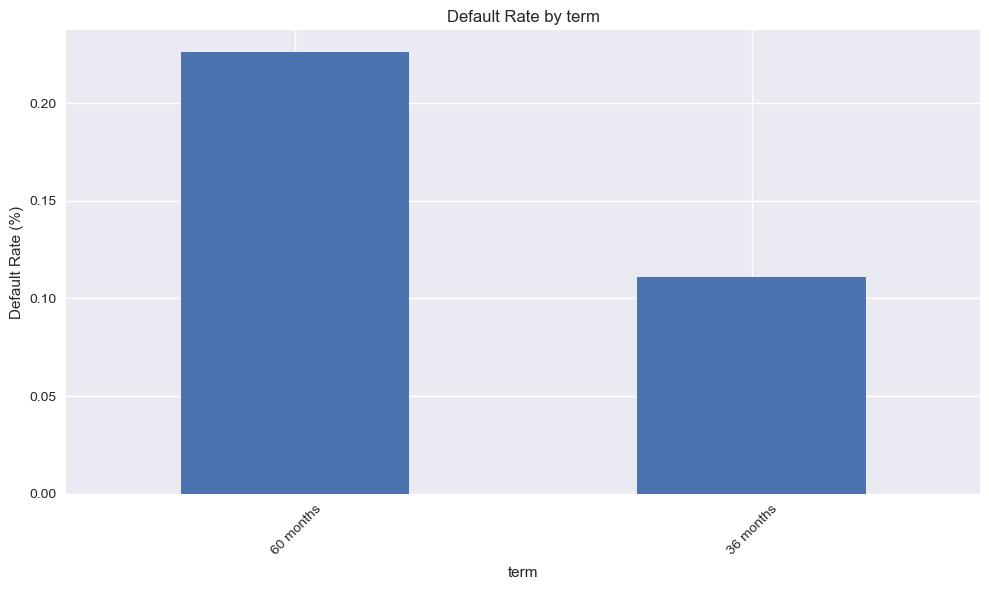


Default Analysis by income_bracket:
loan_status     Charged Off  Current  Fully Paid  total_count
income_bracket                                               
0-25k                 18.94     1.01       80.05       257600
100k+                 10.41     3.62       85.97       568700
25k-50k               16.14     2.50       81.36      1316800
50k-75k               14.02     2.98       83.00      1202700
75k-100k              11.76     3.51       84.73       625900 %


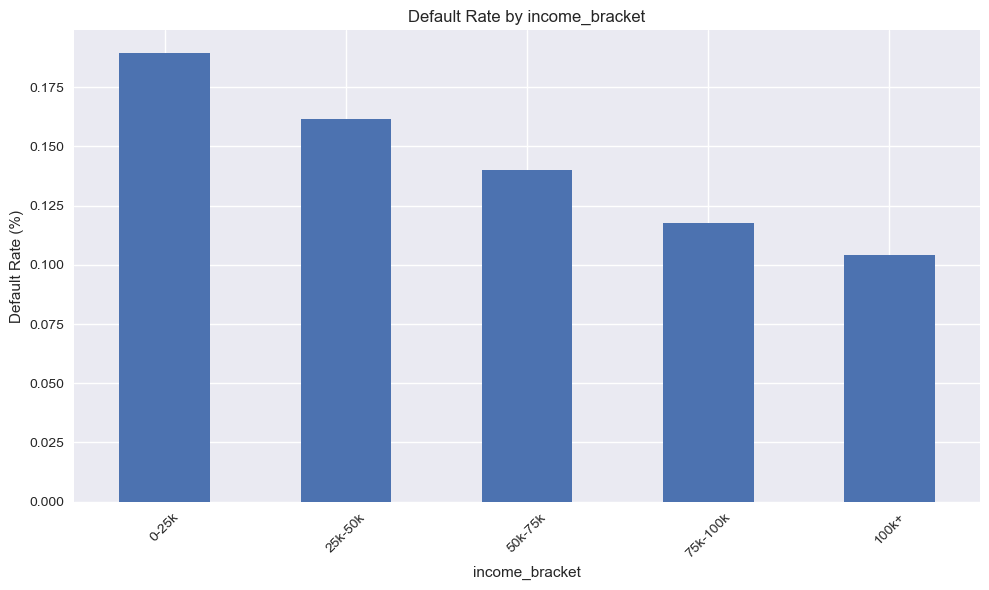

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# First, let's look at the basic loan status distribution
def analyze_loan_status_distribution(df):
    status_counts = df['loan_status'].value_counts()
    status_percentages = df['loan_status'].value_counts(normalize=True) * 100
    
    print("\nLoan Status Distribution:")
    print("\nCounts:")
    print(status_counts)
    print("\nPercentages:")
    print(status_percentages.round(2), "%")

# Let's analyze each category separately
def analyze_category_defaults(df, category):
    # Calculate defaults by category
    defaults_by_category = df.groupby(category)['loan_status'].value_counts(normalize=True).unstack()
    
    # Add total counts
    defaults_by_category['total_count'] = df[category].value_counts()
    
    print(f"\nDefault Analysis by {category}:")
    print(defaults_by_category.round(4) * 100, "%")
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    if 'Charged Off' in defaults_by_category.columns:
        defaults_by_category['Charged Off'].sort_values(ascending=False).plot(kind='bar')
        plt.title(f'Default Rate by {category}')
        plt.ylabel('Default Rate (%)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Let's analyze each important category:

# 1. Analyze overall loan status
analyze_loan_status_distribution(df)

# 2. Analyze by grade
analyze_category_defaults(df, 'grade')

# 3. Analyze by home ownership
analyze_category_defaults(df, 'home_ownership')

# 4. Analyze by purpose
analyze_category_defaults(df, 'purpose')

# 5. Analyze by employment length
analyze_category_defaults(df, 'emp_length')

# 6. Analyze by verification status
analyze_category_defaults(df, 'verification_status')

# 7. Analyze by term
analyze_category_defaults(df, 'term')

# For income analysis, let's create custom brackets
def analyze_income_brackets(df):
    # Create income brackets manually
    conditions = [
        (df['annual_inc'] <= 25000),
        (df['annual_inc'] <= 50000),
        (df['annual_inc'] <= 75000),
        (df['annual_inc'] <= 100000),
        (df['annual_inc'] > 100000)
    ]
    choices = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k+']
    
    df['income_bracket'] = np.select(conditions, choices, default='100k+')
    
    analyze_category_defaults(df, 'income_bracket')

# 8. Analyze by income brackets
analyze_income_brackets(df)


LOAN GRADE ANALYSIS
Purpose: Analyze default rates by loan grade (A through G)
Units: Default rate (%), Number of loans
Note: Grade A is highest quality, G is lowest quality

=== DEFAULT ANALYSIS BY LOAN GRADE ===

Category Statistics:
Total Loans in each category:
grade
A    10085
B    12020
C     8098
D     5307
E     2842
F     1049
G      316
Name: total_loans, dtype: int64

Default Rates (%):
grade
G    31.96
F    30.41
E    25.16
D    21.07
C    16.63
B    11.86
A     5.97
Name: Charged Off, dtype: float64


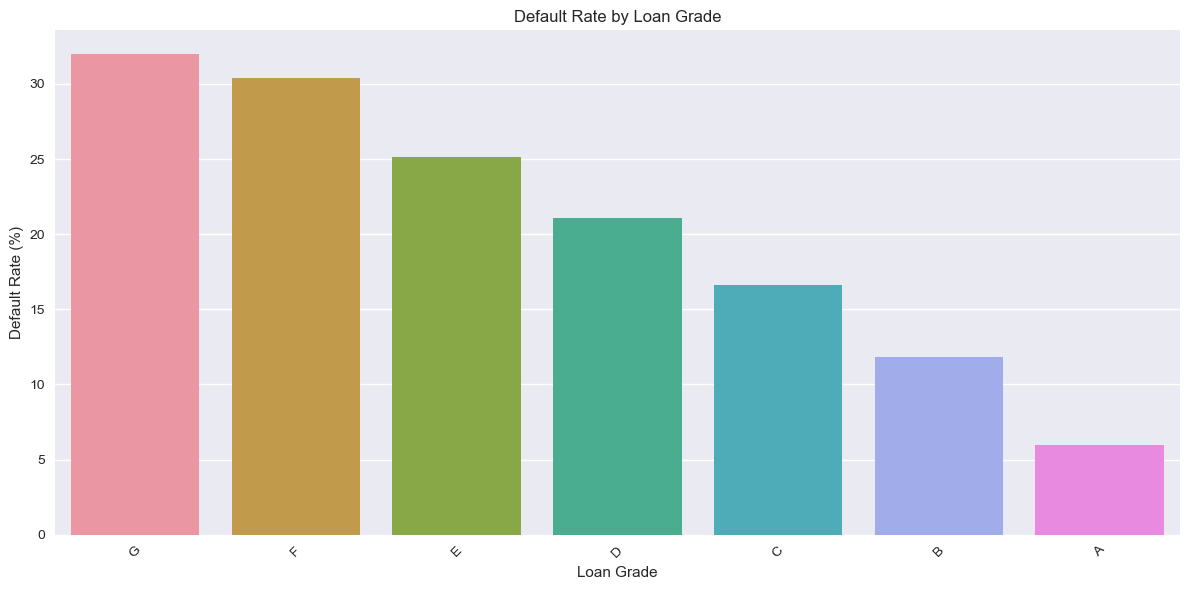


HOME OWNERSHIP ANALYSIS
Purpose: Analyze default rates by home ownership status
Units: Default rate (%), Number of loans
Categories: RENT, OWN, MORTGAGE, OTHER

=== DEFAULT ANALYSIS BY HOME OWNERSHIP STATUS ===

Category Statistics:
Total Loans in each category:
home_ownership
MORTGAGE    17659
NONE            3
OTHER          98
OWN          3058
RENT        18899
Name: total_loans, dtype: int64

Default Rates (%):
home_ownership
OTHER       18.37
RENT        15.02
OWN         14.49
MORTGAGE    13.18
NONE          NaN
Name: Charged Off, dtype: float64


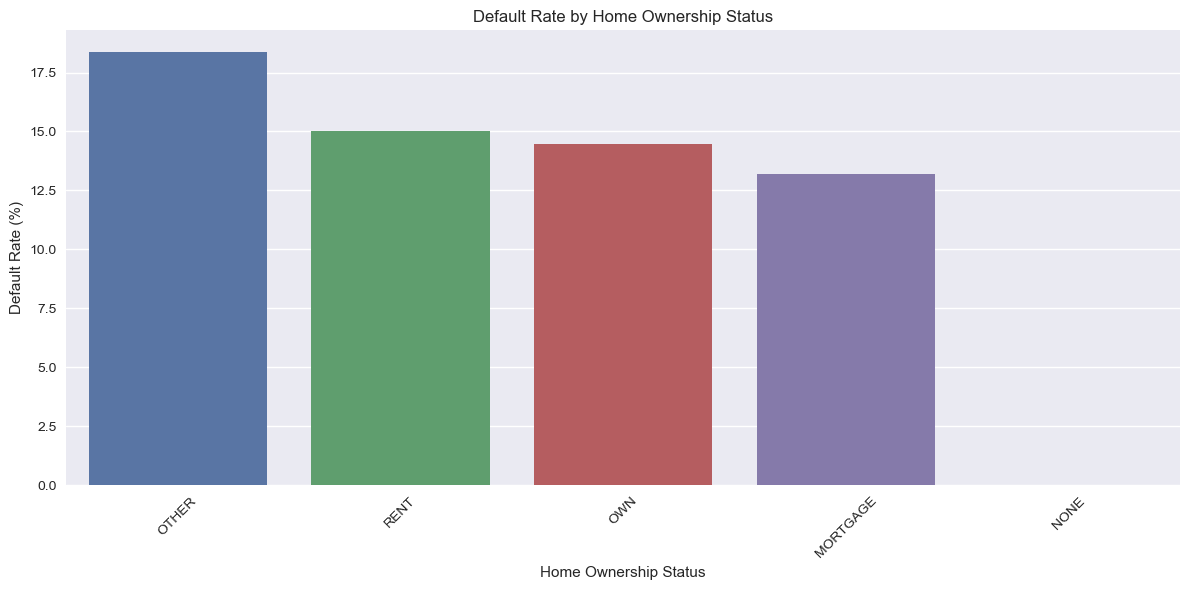


LOAN PURPOSE ANALYSIS
Purpose: Analyze default rates by loan purpose
Units: Default rate (%), Number of loans

=== DEFAULT ANALYSIS BY LOAN PURPOSE ===

Category Statistics:
Total Loans in each category:
purpose
car                    1549
credit_card            5130
debt_consolidation    18641
educational             325
home_improvement       2976
house                   381
major_purchase         2187
medical                 693
moving                  583
other                  3993
renewable_energy        103
small_business         1828
vacation                381
wedding                 947
Name: total_loans, dtype: int64

Default Rates (%):
purpose
small_business        25.98
renewable_energy      18.45
educational           17.23
other                 15.85
moving                15.78
house                 15.49
medical               15.30
debt_consolidation    14.84
vacation              13.91
home_improvement      11.66
credit_card           10.57
car                   10.33

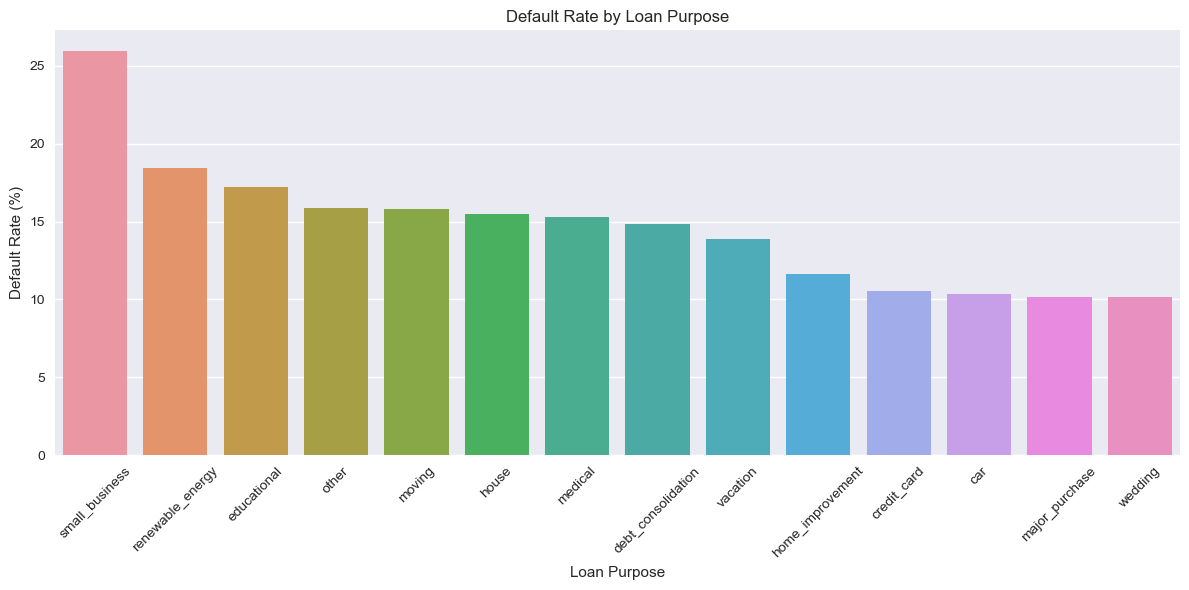


INCOME BRACKET ANALYSIS
Purpose: Analyze default rates by annual income levels
Units: Income (USD/year), Default rate (%), Number of loans

=== DEFAULT ANALYSIS BY ANNUAL INCOME ===

Category Statistics:
Total Loans in each category:
income_bracket
$0-25k        2576
$25k-50k     13168
$50k-75k     12027
$75k-100k     6259
$100k+        5687
Name: total_loans, dtype: int64

Default Rates (%):
income_bracket
$0-25k       18.94
$25k-50k     16.14
$50k-75k     14.02
$75k-100k    11.76
$100k+       10.41
Name: Charged Off, dtype: float64


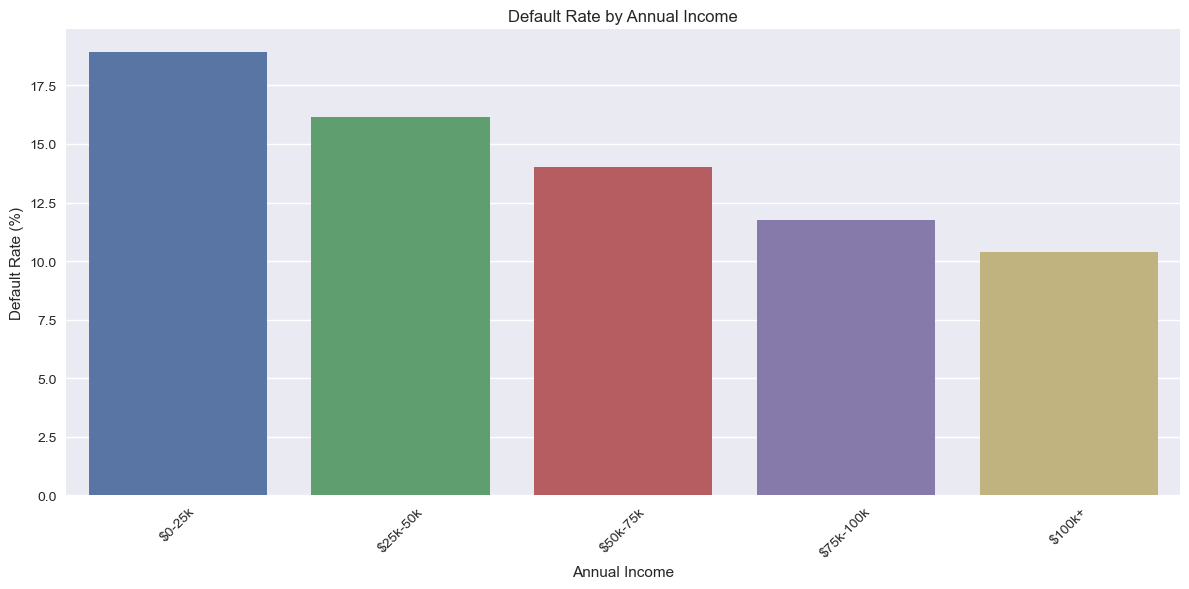


COMBINED RISK FACTOR ANALYSIS

High-Risk Profile Combinations:
1. Low Grade (D-G) + Low Income (<$50k) + Rent
2. Low Grade (D-G) + High DTI (>20%) + Short Employment (<2 years)
3. High Loan Amount + Low Income + Rent

Default Rate for high_risk_combo1:
high_risk_combo1
False    13.51
True     25.88
Name: Charged Off, dtype: float64 %
Number of loans in each category:
False    37607
True      2110
Name: high_risk_combo1, dtype: int64

Default Rate for high_risk_combo2:
high_risk_combo2
False    14.06
True     21.98
Name: Charged Off, dtype: float64 %
Number of loans in each category:
False    39171
True       546
Name: high_risk_combo2, dtype: int64


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_loan_status_distribution(df):
    """
    Analyzes the overall distribution of loan statuses
    Returns: Distribution of Fully Paid, Charged Off, and Current loans
    Units: Both counts and percentages (%)
    """
    status_counts = df['loan_status'].value_counts()
    status_percentages = df['loan_status'].value_counts(normalize=True) * 100
    
    print("\n=== OVERALL LOAN STATUS DISTRIBUTION ===")
    print("\nTotal Number of Loans by Status:")
    print(status_counts)
    print("\nPercentage Distribution:")
    print(status_percentages.round(2), "%")
    
    # Visualization
    plt.figure(figsize=(10, 6))
    status_percentages.plot(kind='bar')
    plt.title('Distribution of Loan Status')
    plt.ylabel('Percentage of Total Loans (%)')
    plt.xlabel('Loan Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def analyze_category_defaults(df, category, title=None):
    """
    Analyzes default rates by specified category
    Parameters:
        category: The column to analyze
        title: Custom title for the analysis (optional)
    Units: 
        - Default Rate: Percentage (%)
        - Total Count: Number of loans
    """
    if title is None:
        title = category.replace('_', ' ').title()
    
    # Calculate defaults by category
    defaults_by_category = df.groupby(category)['loan_status'].value_counts(normalize=True).unstack()
    defaults_by_category['total_loans'] = df[category].value_counts()
    
    print(f"\n=== DEFAULT ANALYSIS BY {title.upper()} ===")
    print("\nCategory Statistics:")
    print("Total Loans in each category:")
    print(defaults_by_category['total_loans'])
    print("\nDefault Rates (%):")
    if 'Charged Off' in defaults_by_category.columns:
        default_rates = defaults_by_category['Charged Off'].sort_values(ascending=False) * 100
        print(default_rates.round(2))
    
    # Visualization
    plt.figure(figsize=(12, 6))
    if 'Charged Off' in defaults_by_category.columns:
        sns.barplot(x=default_rates.index, y=default_rates.values)
        plt.title(f'Default Rate by {title}')
        plt.ylabel('Default Rate (%)')
        plt.xlabel(title)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    return defaults_by_category

# Run analyses for each category with documentation

# 1. Grade Analysis
print("\n" + "="*50)
print("LOAN GRADE ANALYSIS")
print("Purpose: Analyze default rates by loan grade (A through G)")
print("Units: Default rate (%), Number of loans")
print("Note: Grade A is highest quality, G is lowest quality")
grade_analysis = analyze_category_defaults(df, 'grade', 'Loan Grade')

# 2. Home Ownership Analysis
print("\n" + "="*50)
print("HOME OWNERSHIP ANALYSIS")
print("Purpose: Analyze default rates by home ownership status")
print("Units: Default rate (%), Number of loans")
print("Categories: RENT, OWN, MORTGAGE, OTHER")
home_analysis = analyze_category_defaults(df, 'home_ownership', 'Home Ownership Status')

# 3. Loan Purpose Analysis
print("\n" + "="*50)
print("LOAN PURPOSE ANALYSIS")
print("Purpose: Analyze default rates by loan purpose")
print("Units: Default rate (%), Number of loans")
purpose_analysis = analyze_category_defaults(df, 'purpose', 'Loan Purpose')

# 4. Income Analysis
def analyze_income_brackets(df):
    """
    Analyzes default rates by income brackets
    Units: 
        - Income: USD (annual)
        - Default Rate: Percentage (%)
        - Count: Number of loans
    """
    # Create income brackets
    bins = [0, 25000, 50000, 75000, 100000, float('inf')]
    labels = ['$0-25k', '$25k-50k', '$50k-75k', '$75k-100k', '$100k+']
    df['income_bracket'] = pd.cut(df['annual_inc'], bins=bins, labels=labels)
    
    print("\n" + "="*50)
    print("INCOME BRACKET ANALYSIS")
    print("Purpose: Analyze default rates by annual income levels")
    print("Units: Income (USD/year), Default rate (%), Number of loans")
    return analyze_category_defaults(df, 'income_bracket', 'Annual Income')

income_analysis = analyze_income_brackets(df)

# Common Sense Combinations Analysis
print("\n" + "="*50)
print("COMBINED RISK FACTOR ANALYSIS")
print("\nHigh-Risk Profile Combinations:")
print("1. Low Grade (D-G) + Low Income (<$50k) + Rent")
print("2. Low Grade (D-G) + High DTI (>20%) + Short Employment (<2 years)")
print("3. High Loan Amount + Low Income + Rent")

# Let's analyze these combinations
def analyze_risk_combinations(df):
    """
    Analyzes default rates for combined risk factors
    Units: Default rate (%), Number of loans
    """
    # Create risk combination flags
    df['high_risk_combo1'] = (
        (df['grade'].isin(['D','E','F','G'])) & 
        (df['annual_inc'] < 50000) & 
        (df['home_ownership'] == 'RENT')
    )
    
    df['high_risk_combo2'] = (
        (df['grade'].isin(['D','E','F','G'])) & 
        (df['dti'] > 20) & 
        (df['emp_length'].isin(['< 1 year', '1 year', '2 years']))
    )
    
    # Analyze default rates for these combinations
    for combo in ['high_risk_combo1', 'high_risk_combo2']:
        combo_defaults = df.groupby(combo)['loan_status'].value_counts(normalize=True).unstack()
        print(f"\nDefault Rate for {combo}:")
        print((combo_defaults['Charged Off'] * 100).round(2), "%")
        print("Number of loans in each category:")
        print(df[combo].value_counts())

analyze_risk_combinations(df)

In [17]:
import pandas as pd
import numpy as np

def analyze_grade_metrics(df):
    """
    Creates a comprehensive grade analysis with specified metrics
    
    Output Columns:
    1. Grade: Loan grade (A through G)
    2. Number_of_Borrowers: Count of unique borrowers in each grade
    3. Total_Loans: Count of total loans in each grade
    4. Total_Loan_Amount: Sum of loan amounts in each grade ($)
    5. Default_Rate: Percentage of loans charged off (%)
    6. Success_Rate: Percentage of loans fully paid (%)
    7. Running_Rate: Percentage of current loans (%)
    """
    
    # Create the analysis dataframe
    grade_analysis = pd.DataFrame()
    
    # 1. Grade (will be the index)
    grade_analysis['Number_of_Borrowers'] = df.groupby('grade')['member_id'].nunique()
    
    # 2. Total number of loans per grade
    grade_analysis['Total_Loans'] = df.groupby('grade').size()
    
    # 3. Total loan amount per grade
    grade_analysis['Total_Loan_Amount'] = df.groupby('grade')['loan_amnt'].sum()
    
    # 4, 5, 6. Calculate rates
    status_by_grade = df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()
    
    grade_analysis['Default_Rate'] = status_by_grade.get('Charged Off', 0) * 100
    grade_analysis['Success_Rate'] = status_by_grade.get('Fully Paid', 0) * 100
    grade_analysis['Running_Rate'] = status_by_grade.get('Current', 0) * 100
    
    # Format the output
    grade_analysis = grade_analysis.round(2)
    grade_analysis['Total_Loan_Amount'] = grade_analysis['Total_Loan_Amount'].apply(lambda x: f"${x:,.2f}")
    
    print("\n=== LOAN GRADE ANALYSIS ===")
    print("\nMetrics by Loan Grade:")
    print("-" * 100)
    print(grade_analysis)
    print("-" * 100)
    print("\nColumn Descriptions:")
    print("Number_of_Borrowers: Unique borrowers in each grade")
    print("Total_Loans: Total number of loans issued")
    print("Total_Loan_Amount: Total amount of money loaned")
    print("Default_Rate: Percentage of loans that defaulted")
    print("Success_Rate: Percentage of loans fully paid")
    print("Running_Rate: Percentage of loans currently active")
    
    return grade_analysis

# Run the analysis
grade_metrics = analyze_grade_metrics(df)


=== LOAN GRADE ANALYSIS ===

Metrics by Loan Grade:
----------------------------------------------------------------------------------------------------
       Number_of_Borrowers  Total_Loans Total_Loan_Amount  Default_Rate  \
grade                                                                     
A                    10085        10085    $86,982,400.00          5.97   
B                    12020        12020   $133,651,350.00         11.86   
C                     8098         8098    $89,115,825.00         16.63   
D                     5307         5307    $65,160,400.00         21.07   
E                     2842         2842    $45,037,900.00         25.16   
F                     1049         1049    $19,263,100.00         30.41   
G                      316          316     $6,391,675.00         31.96   

       Success_Rate  Running_Rate  
grade                              
A             93.63          0.40  
B             85.27          2.87  
C             80.11       

In [18]:
import pandas as pd
import numpy as np

def analyze_grade_metrics(df):
    """
    Creates a compact grade analysis
    
    Columns:
    Grade: Loan grade
    Borr_Cnt: Number of unique borrowers
    Loan_Cnt: Total loan count
    Total_Amt: Total loan amount
    Def_%: Default rate
    Succ_%: Success rate
    Run_%: Running loan rate
    """
    
    # Create analysis with shortened column names
    analysis = pd.DataFrame()
    
    # Calculate metrics
    analysis['Borr_Cnt'] = df.groupby('grade')['member_id'].nunique()
    analysis['Loan_Cnt'] = df.groupby('grade').size()
    analysis['Total_Amt'] = df.groupby('grade')['loan_amnt'].sum()
    
    # Calculate rates
    status_rates = df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()
    
    analysis['Def_%'] = status_rates.get('Charged Off', 0) * 100
    analysis['Succ_%'] = status_rates.get('Fully Paid', 0) * 100
    analysis['Run_%'] = status_rates.get('Current', 0) * 100
    
    # Format numbers
    analysis['Total_Amt'] = analysis['Total_Amt'].apply(lambda x: f"${x:,.0f}")
    analysis = analysis.round(2)
    
    # Display with better formatting
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    
    print("\n=== LOAN GRADE ANALYSIS ===")
    print("\nColumn Definitions:")
    print("Borr_Cnt: Number of unique borrowers")
    print("Loan_Cnt: Total number of loans")
    print("Total_Amt: Total loan amount")
    print("Def_%: Default rate (%)")
    print("Succ_%: Success rate (%)")
    print("Run_%: Current loan rate (%)")
    print("\nAnalysis:")
    print(analysis)
    
    return analysis

# Run the analysis
grade_metrics = analyze_grade_metrics(df)


=== LOAN GRADE ANALYSIS ===

Column Definitions:
Borr_Cnt: Number of unique borrowers
Loan_Cnt: Total number of loans
Total_Amt: Total loan amount
Def_%: Default rate (%)
Succ_%: Success rate (%)
Run_%: Current loan rate (%)

Analysis:
       Borr_Cnt  Loan_Cnt     Total_Amt  Def_%  Succ_%  Run_%
grade                                                        
A         10085     10085   $86,982,400   5.97   93.63   0.40
B         12020     12020  $133,651,350  11.86   85.27   2.87
C          8098      8098   $89,115,825  16.63   80.11   3.26
D          5307      5307   $65,160,400  21.07   74.75   4.18
E          2842      2842   $45,037,900  25.16   68.54   6.30
F          1049      1049   $19,263,100  30.41   62.63   6.96
G           316       316    $6,391,675  31.96   62.66   5.38


In [19]:
# Each member_id has single loan record
# Each member has applied for loan in individual capacity
# 

In [20]:
import pandas as pd
import numpy as np

def analyze_grade_metrics(df):
   """
   Creates a compact grade analysis
   
   Columns:
   Grade: Loan grade
   Loan_Cnt_%: Percentage of loans in each grade
   Loan_Cnt: Total loan count
   Total_Amt: Total loan amount in INR
   Amt_%: Percentage of total amount in each grade
   Def_%: Default rate
   Succ_%: Success rate 
   Run_%: Running loan rate
   """
   
   # Create analysis with shortened column names
   analysis = pd.DataFrame()
   
   # Calculate loan counts and percentages
   analysis['Loan_Cnt'] = df.groupby('grade').size()
   analysis['Loan_Cnt_%'] = (analysis['Loan_Cnt'] / analysis['Loan_Cnt'].sum() * 100).round(2)
   
   # Calculate total amounts and percentages 
   analysis['Total_Amt'] = df.groupby('grade')['loan_amnt'].sum()
   analysis['Amt_%'] = (analysis['Total_Amt'] / analysis['Total_Amt'].sum() * 100).round(2)
   
   # Calculate rates
   status_rates = df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()
   
   analysis['Def_%'] = status_rates.get('Charged Off', 0) * 100
   analysis['Succ_%'] = status_rates.get('Fully Paid', 0) * 100
   analysis['Run_%'] = status_rates.get('Current', 0) * 100
   
   # Format amount in INR with symbol
   analysis['Total_Amt'] = analysis['Total_Amt'].apply(lambda x: f"₹{x:,.0f}")
   
   # Reorder columns
   analysis = analysis[['Loan_Cnt_%', 'Loan_Cnt', 'Total_Amt', 'Amt_%', 'Def_%', 'Succ_%', 'Run_%']]
   
   # Format numbers
   analysis = analysis.round(2)
   
   # Add total row
   total_row = pd.Series({
       'Loan_Cnt_%': 100.00,
       'Loan_Cnt': analysis['Loan_Cnt'].sum(),
       'Total_Amt': f"₹{df['loan_amnt'].sum():,.0f}",
       'Amt_%': 100.00,
       'Def_%': (df['loan_status'] == 'Charged Off').mean() * 100,
       'Succ_%': (df['loan_status'] == 'Fully Paid').mean() * 100,
       'Run_%': (df['loan_status'] == 'Current').mean() * 100
   }, name='Total')
   
   analysis = pd.concat([analysis, total_row.to_frame().T])
   
   # Display with better formatting
   pd.set_option('display.max_columns', None)
   pd.set_option('display.width', None)
   pd.set_option('display.max_colwidth', None)
   
   print("\n=== LOAN GRADE ANALYSIS ===")
   print("\nColumn Definitions:")
   print("Loan_Cnt_%: Percentage of total loans in this grade")
   print("Loan_Cnt: Total number of loans")
   print("Total_Amt: Total loan amount in INR")
   print("Amt_%: Percentage of total loan amount")
   print("Def_%: Default rate (%)")
   print("Succ_%: Success rate (%)")
   print("Run_%: Current loan rate (%)")
   print("\nAnalysis:")
   print(analysis)
   
   return analysis

# Run the analysis
grade_metrics = analyze_grade_metrics(df)


=== LOAN GRADE ANALYSIS ===

Column Definitions:
Loan_Cnt_%: Percentage of total loans in this grade
Loan_Cnt: Total number of loans
Total_Amt: Total loan amount in INR
Amt_%: Percentage of total loan amount
Def_%: Default rate (%)
Succ_%: Success rate (%)
Run_%: Current loan rate (%)

Analysis:
      Loan_Cnt_% Loan_Cnt     Total_Amt  Amt_%      Def_%     Succ_%     Run_%
A          25.39    10085   ₹86,982,400  19.52       5.97      93.63       0.4
B          30.26    12020  ₹133,651,350  29.99      11.86      85.27      2.87
C          20.39     8098   ₹89,115,825   20.0      16.63      80.11      3.26
D          13.36     5307   ₹65,160,400  14.62      21.07      74.75      4.18
E           7.16     2842   ₹45,037,900  10.11      25.16      68.54       6.3
F           2.64     1049   ₹19,263,100   4.32      30.41      62.63      6.96
G            0.8      316    ₹6,391,675   1.43      31.96      62.66      5.38
Total      100.0    39717  ₹445,602,650  100.0  14.167737  82.961956  

In [21]:
import pandas as pd
import numpy as np

def analyze_grade_metrics(df):
   """
   Creates a compact grade analysis with consistent decimal formatting
   """
   
   # Create analysis
   analysis = pd.DataFrame()
   
   # Calculate loan counts and percentages
   analysis['Loan_Cnt'] = df.groupby('grade').size()
   analysis['Loan_Cnt_%'] = (analysis['Loan_Cnt'] / analysis['Loan_Cnt'].sum() * 100).round(2)
   
   # Calculate total amounts and percentages 
   analysis['Total_Amt'] = df.groupby('grade')['loan_amnt'].sum()
   analysis['Amt_%'] = (analysis['Total_Amt'] / analysis['Total_Amt'].sum() * 100).round(2)
   
   # Calculate rates
   status_rates = df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()
   
   analysis['Def_%'] = status_rates.get('Charged Off', 0) * 100
   analysis['Succ_%'] = status_rates.get('Fully Paid', 0) * 100
   analysis['Run_%'] = status_rates.get('Current', 0) * 100
   
   # Format amount in INR with symbol
   analysis['Total_Amt'] = analysis['Total_Amt'].apply(lambda x: f"₹{x:,.0f}")
   
   # Reorder columns
   analysis = analysis[['Loan_Cnt_%', 'Loan_Cnt', 'Total_Amt', 'Amt_%', 'Def_%', 'Succ_%', 'Run_%']]
   
   # Add total row with consistent decimal places
   total_row = pd.Series({
       'Loan_Cnt_%': 100.00,
       'Loan_Cnt': analysis['Loan_Cnt'].sum(),
       'Total_Amt': f"₹{df['loan_amnt'].sum():,.0f}",
       'Amt_%': 100.00,
       'Def_%': round((df['loan_status'] == 'Charged Off').mean() * 100, 2),
       'Succ_%': round((df['loan_status'] == 'Fully Paid').mean() * 100, 2),
       'Run_%': round((df['loan_status'] == 'Current').mean() * 100, 2)
   }, name='Total')
   
   analysis = pd.concat([analysis, total_row.to_frame().T])
   
   # Round all numeric columns to 2 decimal places
   numeric_columns = ['Loan_Cnt_%', 'Amt_%', 'Def_%', 'Succ_%', 'Run_%']
   analysis[numeric_columns] = analysis[numeric_columns].round(2)
   
   print("\n=== LOAN GRADE ANALYSIS ===")
   print("\nColumn Definitions:")
   print("Loan_Cnt_%: Percentage of total loans in this grade")
   print("Loan_Cnt: Total number of loans")
   print("Total_Amt: Total loan amount in INR")
   print("Amt_%: Percentage of total loan amount")
   print("Def_%: Default rate (%)")
   print("Succ_%: Success rate (%)")
   print("Run_%: Current loan rate (%)")
   print("\nAnalysis:")
   print(analysis)
   
   return analysis

# Run the analysis
grade_metrics = analyze_grade_metrics(df)


=== LOAN GRADE ANALYSIS ===

Column Definitions:
Loan_Cnt_%: Percentage of total loans in this grade
Loan_Cnt: Total number of loans
Total_Amt: Total loan amount in INR
Amt_%: Percentage of total loan amount
Def_%: Default rate (%)
Succ_%: Success rate (%)
Run_%: Current loan rate (%)

Analysis:
      Loan_Cnt_% Loan_Cnt     Total_Amt  Amt_%      Def_%     Succ_%     Run_%
A          25.39    10085   ₹86,982,400  19.52   5.969261   93.63411  0.396629
B          30.26    12020  ₹133,651,350  29.99  11.855241  85.274542  2.870216
C          20.39     8098   ₹89,115,825   20.0  16.633737  80.106199  3.260064
D          13.36     5307   ₹65,160,400  14.62  21.066516   74.75033  4.183154
E           7.16     2842   ₹45,037,900  10.11  25.158339  68.543279  6.298381
F           2.64     1049   ₹19,263,100   4.32  30.409914  62.631077  6.959009
G            0.8      316    ₹6,391,675   1.43  31.962025  62.658228  5.379747
Total      100.0    39717  ₹445,602,650  100.0      14.17      82.96  

In [23]:
import pandas as pd
import numpy as np

def analyze_grade_metrics(df):
   """
   Creates a compact grade analysis with consistent decimal formatting for all columns
   """
   
   # Create analysis
   analysis = pd.DataFrame()
   
   # Calculate loan counts and percentages
   analysis['Loan_Cnt'] = df.groupby('grade').size()
   analysis['Loan_Cnt_%'] = (analysis['Loan_Cnt'] / analysis['Loan_Cnt'].sum() * 100).round(1)
   
   # Calculate total amounts and percentages 
   analysis['Total_Amt'] = df.groupby('grade')['loan_amnt'].sum()
   analysis['Amt_%'] = (analysis['Total_Amt'] / analysis['Total_Amt'].sum() * 100).round(1)
   
   # Calculate rates and round to 2 decimal places
   status_rates = df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()
   
   analysis['Def_%'] = (status_rates.get('Charged Off', 0) * 100).round(1)
   analysis['Succ_%'] = (status_rates.get('Fully Paid', 0) * 100).round(1)
   analysis['Run_%'] = (status_rates.get('Current', 0) * 100).round(1)
   
   # Format amount in INR with symbol
   analysis['Total_Amt'] = analysis['Total_Amt'].apply(lambda x: f"₹{x:,.0f}")
   
   # Reorder columns
   analysis = analysis[['Loan_Cnt_%', 'Loan_Cnt', 'Total_Amt', 'Amt_%', 'Def_%', 'Succ_%', 'Run_%']]
   
   # Add total row with consistent decimal places
   total_row = pd.Series({
       'Loan_Cnt_%': 100.00,
       'Loan_Cnt': analysis['Loan_Cnt'].sum(),
       'Total_Amt': f"₹{df['loan_amnt'].sum():,.0f}",
       'Amt_%': 100.00,
       'Def_%': round((df['loan_status'] == 'Charged Off').mean() * 100, 1),
       'Succ_%': round((df['loan_status'] == 'Fully Paid').mean() * 100, 1),
       'Run_%': round((df['loan_status'] == 'Current').mean() * 100, 1)
   }, name='Total')
   
   analysis = pd.concat([analysis, total_row.to_frame().T])
   
   # Ensure all percentage columns are rounded to 2 decimal places
   percentage_columns = ['Loan_Cnt_%', 'Amt_%', 'Def_%', 'Succ_%', 'Run_%']
   analysis[percentage_columns] = analysis[percentage_columns].round(2)
   
   print("\n=== LOAN GRADE ANALYSIS ===")
   print("\nColumn Definitions:")
   print("Loan_Cnt_%: Percentage of total loans in this grade")
   print("Loan_Cnt: Total number of loans")
   print("Total_Amt: Total loan amount in INR")
   print("Amt_%: Percentage of total loan amount")
   print("Def_%: Default rate (%)")
   print("Succ_%: Success rate (%)")
   print("Run_%: Current loan rate (%)")
   print("\nAnalysis:")
   print(analysis)
   
   return analysis

# Run the analysis
grade_metrics = analyze_grade_metrics(df)


=== LOAN GRADE ANALYSIS ===

Column Definitions:
Loan_Cnt_%: Percentage of total loans in this grade
Loan_Cnt: Total number of loans
Total_Amt: Total loan amount in INR
Amt_%: Percentage of total loan amount
Def_%: Default rate (%)
Succ_%: Success rate (%)
Run_%: Current loan rate (%)

Analysis:
      Loan_Cnt_% Loan_Cnt     Total_Amt  Amt_% Def_% Succ_% Run_%
A           25.4    10085   ₹86,982,400   19.5   6.0   93.6   0.4
B           30.3    12020  ₹133,651,350   30.0  11.9   85.3   2.9
C           20.4     8098   ₹89,115,825   20.0  16.6   80.1   3.3
D           13.4     5307   ₹65,160,400   14.6  21.1   74.8   4.2
E            7.2     2842   ₹45,037,900   10.1  25.2   68.5   6.3
F            2.6     1049   ₹19,263,100    4.3  30.4   62.6   7.0
G            0.8      316    ₹6,391,675    1.4  32.0   62.7   5.4
Total      100.0    39717  ₹445,602,650  100.0  14.2   83.0   2.9


In [26]:
import pandas as pd
import numpy as np

def analyze_grade_metrics(df):
   """
   Creates a compact grade analysis with rearranged columns and average loan amount
   """
   
   # Create analysis
   analysis = pd.DataFrame()
   
   # Calculate loan counts and percentages
   analysis['Loan_Cnt'] = df.groupby('grade').size()
   analysis['Loan_Cnt_%'] = (analysis['Loan_Cnt'] / analysis['Loan_Cnt'].sum() * 100).round(2)
   
   # Calculate total amounts and percentages
   analysis['Total_Amt'] = df.groupby('grade')['loan_amnt'].sum()
   
   # Calculate average loan amount
   analysis['Average_Loan_Amt'] = (analysis['Total_Amt'] / analysis['Loan_Cnt']).round(0)
   
   analysis['Amt_%'] = (analysis['Total_Amt'] / analysis['Total_Amt'].sum() * 100).round(2)
   
   # Calculate rates and round to 2 decimal places
   status_rates = df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()
   
   analysis['Def_%'] = (status_rates.get('Charged Off', 0) * 100).round(2)
   analysis['Succ_%'] = (status_rates.get('Fully Paid', 0) * 100).round(2)
   analysis['Run_%'] = (status_rates.get('Current', 0) * 100).round(2)
   
   # Format amount columns with INR symbol
   analysis['Total_Amt'] = analysis['Total_Amt'].apply(lambda x: f"₹{x:,.0f}")
   analysis['Av_L_Amt'] = analysis['Average_Loan_Amt'].apply(lambda x: f"₹{x:,.0f}")
   
   # Add total row with consistent decimal places
   total_row = pd.Series({
       'Loan_Cnt': analysis['Loan_Cnt'].sum(),
       'Loan_Cnt_%': 100.00,
       'Total_Amt': f"₹{df['loan_amnt'].sum():,.0f}",
       'Average_Loan_Amt': f"₹{(df['loan_amnt'].sum() / len(df)):,.0f}",
       'Amt_%': 100.00,
       'Def_%': round((df['loan_status'] == 'Charged Off').mean() * 100, 2),
       'Succ_%': round((df['loan_status'] == 'Fully Paid').mean() * 100, 2),
       'Run_%': round((df['loan_status'] == 'Current').mean() * 100, 2)
   }, name='Total')
   
   # Combine main analysis with total row
   analysis = pd.concat([analysis, total_row.to_frame().T])
   
   # Reorder columns as requested
   column_order = ['Loan_Cnt', 'Loan_Cnt_%', 'Total_Amt', 'Av_L_Amt', 'Amt_%', 'Def_%', 'Succ_%', 'Run_%']
   analysis = analysis[column_order]
   
   print("\n=== LOAN GRADE ANALYSIS ===")
   print("\nColumn Definitions:")
   print("Loan_Cnt: Total number of loans")
   print("Loan_Cnt_%: Percentage of total loans in this grade")
   print("Total_Amt: Total loan amount in INR")
   print("Av_L_Amt: Average loan amount in INR")
   print("Amt_%: Percentage of total loan amount")
   print("Def_%: Default rate (%)")
   print("Succ_%: Success rate (%)")
   print("Run_%: Current loan rate (%)")
   print("\nAnalysis:")
   print(analysis)
   
   return analysis

# Run the analysis
grade_metrics = analyze_grade_metrics(df)


=== LOAN GRADE ANALYSIS ===

Column Definitions:
Loan_Cnt: Total number of loans
Loan_Cnt_%: Percentage of total loans in this grade
Total_Amt: Total loan amount in INR
Av_L_Amt: Average loan amount in INR
Amt_%: Percentage of total loan amount
Def_%: Default rate (%)
Succ_%: Success rate (%)
Run_%: Current loan rate (%)

Analysis:
      Loan_Cnt Loan_Cnt_%     Total_Amt Av_L_Amt  Amt_%  Def_% Succ_% Run_%
A        10085      25.39   ₹86,982,400   ₹8,625  19.52   5.97  93.63   0.4
B        12020      30.26  ₹133,651,350  ₹11,119  29.99  11.86  85.27  2.87
C         8098      20.39   ₹89,115,825  ₹11,005   20.0  16.63  80.11  3.26
D         5307      13.36   ₹65,160,400  ₹12,278  14.62  21.07  74.75  4.18
E         2842       7.16   ₹45,037,900  ₹15,847  10.11  25.16  68.54   6.3
F         1049       2.64   ₹19,263,100  ₹18,363   4.32  30.41  62.63  6.96
G          316        0.8    ₹6,391,675  ₹20,227   1.43  31.96  62.66  5.38
Total    39717      100.0  ₹445,602,650      NaN  100.0  

In [30]:
import pandas as pd
import numpy as np

def analyze_grade_metrics(df):
   """
   Creates a compact grade analysis with additional interest rate and duration columns
   """
   
   # Create analysis
   analysis = pd.DataFrame()
   
   # Calculate loan counts and percentages
   analysis['Loan_Cnt'] = df.groupby('grade').size()
   analysis['Loan_Cnt_%'] = (analysis['Loan_Cnt'] / analysis['Loan_Cnt'].sum() * 100).round(2)
   
   # Calculate total amounts and percentages
   analysis['Total_Amt'] = df.groupby('grade')['loan_amnt'].sum()
   
   # Calculate average loan amount
   analysis['Av_L_Amt'] = (analysis['Total_Amt'] / analysis['Loan_Cnt']).round(0)
   
   analysis['Amt_%'] = (analysis['Total_Amt'] / analysis['Total_Amt'].sum() * 100).round(2)
   
   # Calculate rates and round to 2 decimal places
   status_rates = df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()
   
   analysis['Def_%'] = (status_rates.get('Charged Off', 0) * 100).round(2)
   analysis['Succ_%'] = (status_rates.get('Fully Paid', 0) * 100).round(2)
   analysis['Run_%'] = (status_rates.get('Current', 0) * 100).round(2)
   
   # Calculate average interest rate for each grade
   df['int_rate_num'] = df['int_rate'].str.rstrip('%').astype(float)
   analysis['av_inr_r'] = df.groupby('grade')['int_rate_num'].mean().round(2)
   
   # Calculate average loan duration for each grade
   df['term_num'] = df['term'].str.split().str[0].astype(float)
   analysis['av_ln_d'] = df.groupby('grade')['term_num'].mean().round(2)
   
   # Format amount columns with INR symbol
   analysis['Total_Amt'] = analysis['Total_Amt'].apply(lambda x: f"₹{x:,.0f}")
   analysis['Av_L_Amt'] = analysis['Av_L_Amt'].apply(lambda x: f"₹{x:,.0f}")
   
   # Add total row with consistent decimal places
   total_row = pd.Series({
       'Loan_Cnt': analysis['Loan_Cnt'].sum(),
       'Loan_Cnt_%': 100.00,
       'Total_Amt': f"₹{df['loan_amnt'].sum():,.0f}",
       'Av_L_Amt': 'NA',
       'Amt_%': 100.00,
       'Def_%': round((df['loan_status'] == 'Charged Off').mean() * 100, 2),
       'Succ_%': round((df['loan_status'] == 'Fully Paid').mean() * 100, 2),
       'Run_%': round((df['loan_status'] == 'Current').mean() * 100, 2),
       'av_inr_r': round(df['int_rate_num'].mean(), 2),
       'av_ln_d': round(df['term_num'].mean(), 2)
   }, name='Total')
   
   # Combine main analysis with total row
   analysis = pd.concat([analysis, total_row.to_frame().T])
   
   # Reorder columns
   column_order = ['Loan_Cnt', 'Loan_Cnt_%', 'Total_Amt', 'Av_L_Amt', 'Amt_%', 
                  'Def_%', 'Succ_%', 'Run_%', 'av_inr_r', 'av_ln_d']
   analysis = analysis[column_order]
   
   print("\n=== LOAN GRADE ANALYSIS ===")
   print("\nColumn Definitions:")
   print("Loan_Cnt: Total number of loans")
   print("Loan_Cnt_%: Percentage of total loans in this grade")
   print("Total_Amt: Total loan amount in INR")
   print("Av_L_Amt: Average loan amount in INR")
   print("Amt_%: Percentage of total loan amount")
   print("Def_%: Default rate (%)")
   print("Succ_%: Success rate (%)")
   print("Run_%: Current loan rate (%)")
   print("av_inr_r: Average interest rate (%)")
   print("av_ln_d: Average loan duration (months)")
   print("\nAnalysis:")
   print(analysis)
   
   return analysis

# Run the analysis
grade_metrics = analyze_grade_metrics(df)


=== LOAN GRADE ANALYSIS ===

Column Definitions:
Loan_Cnt: Total number of loans
Loan_Cnt_%: Percentage of total loans in this grade
Total_Amt: Total loan amount in INR
Av_L_Amt: Average loan amount in INR
Amt_%: Percentage of total loan amount
Def_%: Default rate (%)
Succ_%: Success rate (%)
Run_%: Current loan rate (%)
av_inr_r: Average interest rate (%)
av_ln_d: Average loan duration (months)

Analysis:
      Ln_Cnt Ln_Cnt_%     Total_Amt Av_L_Amt  Amt_%  Def_% Succ_% Run_%  \
A        NaN      NaN   ₹86,982,400   ₹8,625  19.52   5.97  93.63   0.4   
B        NaN      NaN  ₹133,651,350  ₹11,119  29.99  11.86  85.27  2.87   
C        NaN      NaN   ₹89,115,825  ₹11,005   20.0  16.63  80.11  3.26   
D        NaN      NaN   ₹65,160,400  ₹12,278  14.62  21.07  74.75  4.18   
E        NaN      NaN   ₹45,037,900  ₹15,847  10.11  25.16  68.54   6.3   
F        NaN      NaN   ₹19,263,100  ₹18,363   4.32  30.41  62.63  6.96   
G        NaN      NaN    ₹6,391,675  ₹20,227   1.43  31.96  62.6

In [31]:
import pandas as pd
import numpy as np

def analyze_grade_metrics(df):
   """
   Creates a compact grade analysis with renamed columns
   """
   
   # Create analysis
   analysis = pd.DataFrame()
   
   # Calculate loan counts and percentages
   analysis['Ln_Cnt'] = df.groupby('grade').size()
   analysis['Ln_Cnt_%'] = (analysis['Ln_Cnt'] / analysis['Ln_Cnt'].sum() * 100).round(2)
   
   # Calculate total amounts and percentages
   analysis['Total_Amt'] = df.groupby('grade')['loan_amnt'].sum()
   
   # Calculate average loan amount
   analysis['Av_L_Amt'] = (analysis['Total_Amt'] / analysis['Ln_Cnt']).round(0)
   
   analysis['Amt_%'] = (analysis['Total_Amt'] / analysis['Total_Amt'].sum() * 100).round(2)
   
   # Calculate rates and round to 2 decimal places
   status_rates = df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()
   
   analysis['Def_%'] = (status_rates.get('Charged Off', 0) * 100).round(2)
   analysis['Succ_%'] = (status_rates.get('Fully Paid', 0) * 100).round(2)
   analysis['Run_%'] = (status_rates.get('Current', 0) * 100).round(2)
   
   # Calculate average interest rate for each grade
   df['int_rate_num'] = df['int_rate'].str.rstrip('%').astype(float)
   analysis['av_inr_r_%'] = df.groupby('grade')['int_rate_num'].mean().round(2)
   
   # Calculate average loan duration for each grade
   df['term_num'] = df['term'].str.split().str[0].astype(float)
   analysis['av_ln_d'] = df.groupby('grade')['term_num'].mean().round(2)
   
   # Format amount columns with INR symbol
   analysis['Total_Amt'] = analysis['Total_Amt'].apply(lambda x: f"₹{x:,.0f}")
   analysis['Av_L_Amt'] = analysis['Av_L_Amt'].apply(lambda x: f"₹{x:,.0f}")
   
   # Add total row with consistent decimal places
   total_row = pd.Series({
       'Ln_Cnt': analysis['Ln_Cnt'].sum(),
       'Ln_Cnt_%': 100.00,
       'Total_Amt': f"₹{df['loan_amnt'].sum():,.0f}",
       'Av_L_Amt': 'NA',
       'Amt_%': 100.00,
       'Def_%': round((df['loan_status'] == 'Charged Off').mean() * 100, 2),
       'Succ_%': round((df['loan_status'] == 'Fully Paid').mean() * 100, 2),
       'Run_%': round((df['loan_status'] == 'Current').mean() * 100, 2),
       'av_inr_r_%': round(df['int_rate_num'].mean(), 2),
       'av_ln_d': round(df['term_num'].mean(), 2)
   }, name='Total')
   
   # Combine main analysis with total row
   analysis = pd.concat([analysis, total_row.to_frame().T])
   
   # Reorder columns
   column_order = ['Ln_Cnt', 'Ln_Cnt_%', 'Total_Amt', 'Av_L_Amt', 'Amt_%', 
                  'Def_%', 'Succ_%', 'Run_%', 'av_inr_r_%', 'av_ln_d']
   analysis = analysis[column_order]
   
   print("\n=== LOAN GRADE ANALYSIS ===")
   print("\nColumn Definitions:")
   print("Ln_Cnt: Total number of loans")
   print("Ln_Cnt_%: Percentage of total loans in this grade")
   print("Total_Amt: Total loan amount in INR")
   print("Av_L_Amt: Average loan amount in INR")
   print("Amt_%: Percentage of total loan amount")
   print("Def_%: Default rate (%)")
   print("Succ_%: Success rate (%)")
   print("Run_%: Current loan rate (%)")
   print("av_inr_r_%: Average interest rate (%)")
   print("av_ln_d: Average loan duration (months)")
   print("\nAnalysis:")
   print(analysis)
   
   return analysis

# Run the analysis
grade_metrics = analyze_grade_metrics(df)


=== LOAN GRADE ANALYSIS ===

Column Definitions:
Ln_Cnt: Total number of loans
Ln_Cnt_%: Percentage of total loans in this grade
Total_Amt: Total loan amount in INR
Av_L_Amt: Average loan amount in INR
Amt_%: Percentage of total loan amount
Def_%: Default rate (%)
Succ_%: Success rate (%)
Run_%: Current loan rate (%)
av_inr_r_%: Average interest rate (%)
av_ln_d: Average loan duration (months)

Analysis:
      Ln_Cnt Ln_Cnt_%     Total_Amt Av_L_Amt  Amt_%  Def_% Succ_% Run_%  \
A      10085    25.39   ₹86,982,400   ₹8,625  19.52   5.97  93.63   0.4   
B      12020    30.26  ₹133,651,350  ₹11,119  29.99  11.86  85.27  2.87   
C       8098    20.39   ₹89,115,825  ₹11,005   20.0  16.63  80.11  3.26   
D       5307    13.36   ₹65,160,400  ₹12,278  14.62  21.07  74.75  4.18   
E       2842     7.16   ₹45,037,900  ₹15,847  10.11  25.16  68.54   6.3   
F       1049     2.64   ₹19,263,100  ₹18,363   4.32  30.41  62.63  6.96   
G        316      0.8    ₹6,391,675  ₹20,227   1.43  31.96  62.66 

In [33]:
import pandas as pd
import numpy as np

def analyze_grade_metrics(df):
   """
   Creates a compact grade analysis with average loan amount for total row
   """
   
   # Create analysis
   analysis = pd.DataFrame()
   
   # Calculate loan counts and percentages
   analysis['Ln_Cnt'] = df.groupby('grade').size()
   analysis['Ln_Cnt_%'] = (analysis['Ln_Cnt'] / analysis['Ln_Cnt'].sum() * 100).round(2)
   
   # Calculate total amounts and percentages
   analysis['Total_Amt'] = df.groupby('grade')['loan_amnt'].sum()
   
   # Calculate average loan amount
   analysis['Av_L_Amt'] = (analysis['Total_Amt'] / analysis['Ln_Cnt']).round(0)
   
   analysis['Amt_%'] = (analysis['Total_Amt'] / analysis['Total_Amt'].sum() * 100).round(2)
   
   # Calculate rates and round to 2 decimal places
   status_rates = df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack()
   
   analysis['Def_%'] = (status_rates.get('Charged Off', 0) * 100).round(2)
   analysis['Succ_%'] = (status_rates.get('Fully Paid', 0) * 100).round(2)
   analysis['Run_%'] = (status_rates.get('Current', 0) * 100).round(2)
   
   # Calculate average interest rate for each grade
   df['int_rate_num'] = df['int_rate'].str.rstrip('%').astype(float)
   analysis['av_inr_r_%'] = df.groupby('grade')['int_rate_num'].mean().round(2)
   
   # Calculate average loan duration for each grade
   df['term_num'] = df['term'].str.split().str[0].astype(float)
   analysis['av_ln_d'] = df.groupby('grade')['term_num'].mean().round(2)
   
   # Format amount columns with INR symbol
   analysis['Total_Amt'] = analysis['Total_Amt'].apply(lambda x: f"₹{x:,.0f}")
   analysis['Av_L_Amt'] = analysis['Av_L_Amt'].apply(lambda x: f"₹{x:,.0f}")
   
   # Calculate overall average loan amount for total row
   overall_avg_loan = round(df['loan_amnt'].mean(), 0)
   
   # Add total row with consistent decimal places
   total_row = pd.Series({
       'Ln_Cnt': analysis['Ln_Cnt'].sum(),
       'Ln_Cnt_%': 100.00,
       'Total_Amt': f"₹{df['loan_amnt'].sum():,.0f}",
       'Av_L_Amt': f"₹{overall_avg_loan:,.0f}",
       'Amt_%': 100.00,
       'Def_%': round((df['loan_status'] == 'Charged Off').mean() * 100, 2),
       'Succ_%': round((df['loan_status'] == 'Fully Paid').mean() * 100, 2),
       'Run_%': round((df['loan_status'] == 'Current').mean() * 100, 2),
       'av_inr_r_%': round(df['int_rate_num'].mean(), 2),
       'av_ln_d': round(df['term_num'].mean(), 2)
   }, name='Total')
   
   # Combine main analysis with total row
   analysis = pd.concat([analysis, total_row.to_frame().T])
   
   # Reorder columns
   column_order = ['Ln_Cnt', 'Ln_Cnt_%', 'Total_Amt', 'Av_L_Amt', 'Amt_%', 
                  'Def_%', 'Succ_%', 'Run_%', 'av_inr_r_%', 'av_ln_d']
   analysis = analysis[column_order]
   
   print("\n=== LOAN GRADE ANALYSIS ===")
   print("\nColumn Definitions:")
   print("Ln_Cnt: Total number of loans")
   print("Ln_Cnt_%: Percentage of total loans in this grade")
   print("Total_Amt: Total loan amount in INR")
   print("Av_L_Amt: Average loan amount in INR")
   print("Amt_%: Percentage of total loan amount")
   print("Def_%: Default rate (%)")
   print("Succ_%: Success rate (%)")
   print("Run_%: Current loan rate (%)")
   print("av_inr_r_%: Average interest rate (%)")
   print("av_ln_d: Average loan duration (months)")
   print("\nAnalysis:")
   print(analysis)
   
   return analysis

# Run the analysis
grade_metrics = analyze_grade_metrics(df)


=== LOAN GRADE ANALYSIS ===

Column Definitions:
Ln_Cnt: Total number of loans
Ln_Cnt_%: Percentage of total loans in this grade
Total_Amt: Total loan amount in INR
Av_L_Amt: Average loan amount in INR
Amt_%: Percentage of total loan amount
Def_%: Default rate (%)
Succ_%: Success rate (%)
Run_%: Current loan rate (%)
av_inr_r_%: Average interest rate (%)
av_ln_d: Average loan duration (months)

Analysis:
      Ln_Cnt Ln_Cnt_%     Total_Amt Av_L_Amt  Amt_%  Def_% Succ_% Run_%  \
A      10085    25.39   ₹86,982,400   ₹8,625  19.52   5.97  93.63   0.4   
B      12020    30.26  ₹133,651,350  ₹11,119  29.99  11.86  85.27  2.87   
C       8098    20.39   ₹89,115,825  ₹11,005   20.0  16.63  80.11  3.26   
D       5307    13.36   ₹65,160,400  ₹12,278  14.62  21.07  74.75  4.18   
E       2842     7.16   ₹45,037,900  ₹15,847  10.11  25.16  68.54   6.3   
F       1049     2.64   ₹19,263,100  ₹18,363   4.32  30.41  62.63  6.96   
G        316      0.8    ₹6,391,675  ₹20,227   1.43  31.96  62.66 


=== LOAN PURPOSE ANALYSIS ===

1. Distribution of Loan Purposes:
debt_consolidation    46.93
credit_card           12.92
other                 10.05
home_improvement       7.49
major_purchase         5.51
small_business         4.60
car                    3.90
wedding                2.38
medical                1.74
moving                 1.47
vacation               0.96
house                  0.96
educational            0.82
renewable_energy       0.26
Name: purpose, dtype: float64

2. Loan Amount Statistics by Purpose:
                    avg_loan  median_loan  count  total_amount
purpose                                                       
car                  6777.52       6000.0   1549      10498375
credit_card         11723.62      10000.0   5130      60142150
debt_consolidation  12694.99      11500.0  18641     236647300
educational          6810.46       5400.0    325       2213400
home_improvement    11537.21      10000.0   2976      34334725
house               13071.00    

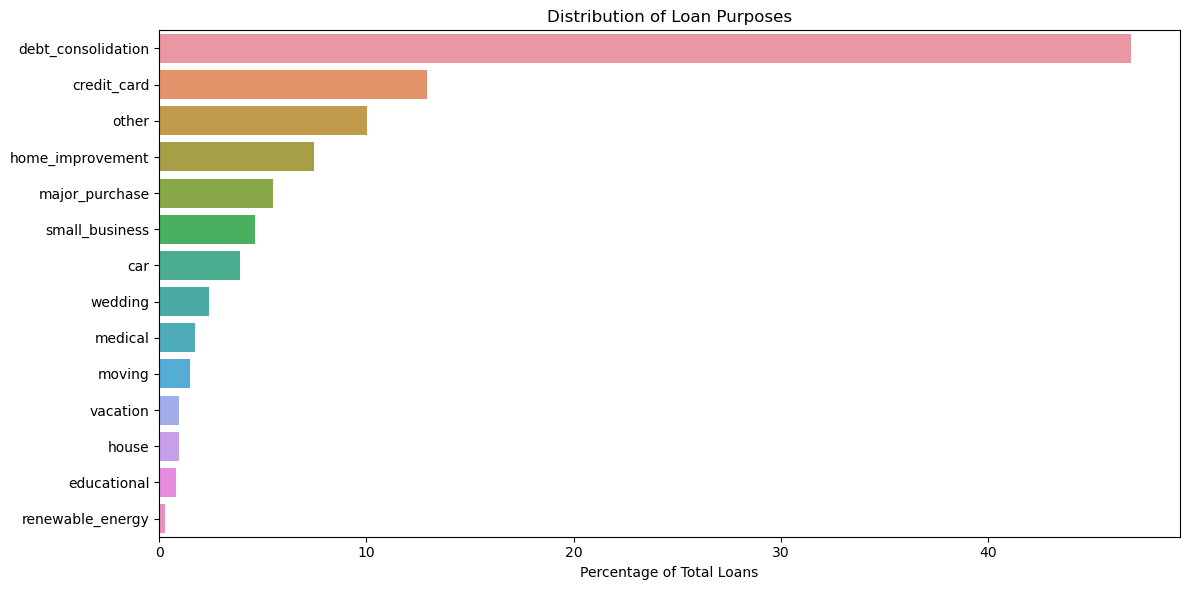

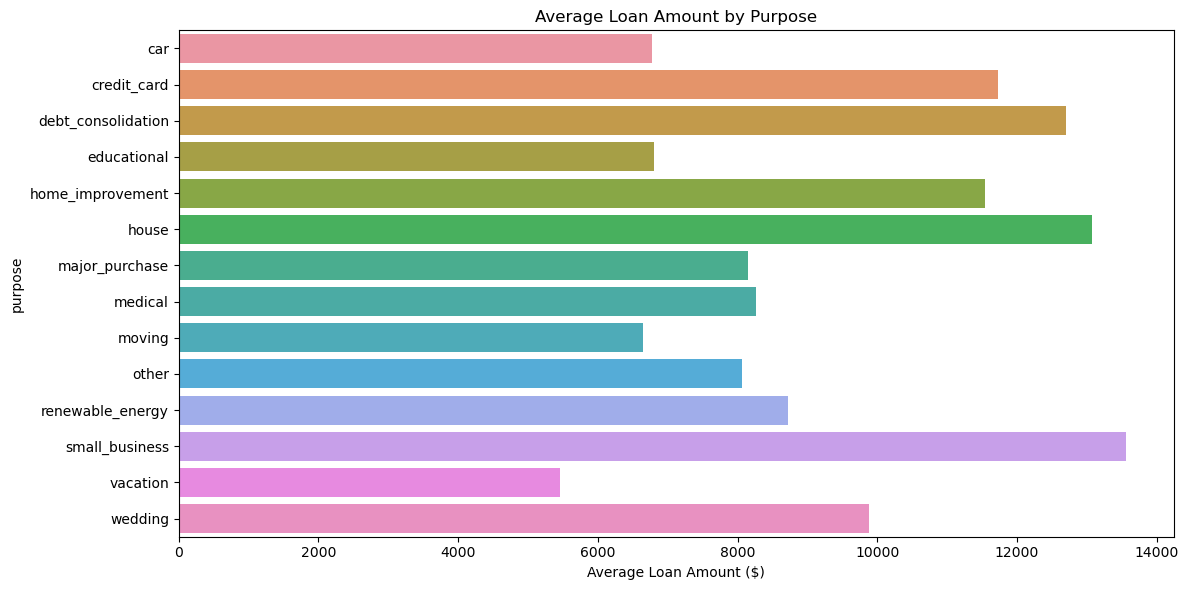

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_loan_purposes(data_path):
    """
    Analyze loan purposes from LendingClub data
    
    Parameters:
    data_path (str): Path to the CSV file containing loan data
    
    Returns:
    tuple: (purpose_counts, purpose_amount_stats, purpose_default_rates)
    """
    # Read the CSV file
    # df = pd.read_csv(data_path)
    df = pd.read_csv(data_path, low_memory=False)
    
    # Basic purpose distribution analysis
    purpose_counts = df['purpose'].value_counts()
    purpose_percentages = (purpose_counts / len(df) * 100).round(2)
    
    # Calculate average loan amount by purpose
    purpose_amount_stats = df.groupby('purpose').agg({
        'loan_amnt': ['mean', 'median', 'count', 'sum']
    }).round(2)
    purpose_amount_stats.columns = ['avg_loan', 'median_loan', 'count', 'total_amount']
    
    # Calculate default rates by purpose
    df['is_default'] = df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)'])
    purpose_default_rates = df.groupby('purpose')['is_default'].agg(['mean', 'count']).round(4)
    purpose_default_rates['default_rate_percent'] = (purpose_default_rates['mean'] * 100).round(2)
    
    # Create visualizations
    plt.figure(figsize=(12, 6))
    sns.barplot(x=purpose_percentages.values, y=purpose_percentages.index)
    plt.title('Distribution of Loan Purposes')
    plt.xlabel('Percentage of Total Loans')
    plt.tight_layout()
    plt.savefig('loan_purposes_distribution.png')
    
    # Create purpose amount visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x=purpose_amount_stats['avg_loan'], y=purpose_amount_stats.index)
    plt.title('Average Loan Amount by Purpose')
    plt.xlabel('Average Loan Amount ($)')
    plt.tight_layout()
    plt.savefig('avg_loan_by_purpose.png')
    
    return {
        'purpose_distribution': purpose_percentages,
        'purpose_stats': purpose_amount_stats,
        'default_rates': purpose_default_rates
    }

def print_analysis(results):
    """Print formatted analysis results"""
    print("\n=== LOAN PURPOSE ANALYSIS ===\n")
    
    print("1. Distribution of Loan Purposes:")
    print(results['purpose_distribution'])
    
    print("\n2. Loan Amount Statistics by Purpose:")
    print(results['purpose_stats'])
    
    print("\n3. Default Rates by Purpose:")
    print(results['default_rates'][['default_rate_percent']])

if __name__ == "__main__":
    # Example usage
    data_path = "/Users/rahulsinha/Downloads/loan.csv"
    results = analyze_loan_purposes(data_path)
    print_analysis(results)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_loan_purposes(data_path):
    """
    Enhanced analysis of loan purposes with detailed statistics
    """
    # Read the CSV file
    df = pd.read_csv(data_path, low_memory=False)
    
    # Create success/default/running loan flags
    df['loan_status'] = df['loan_status'].fillna('Unknown')
    df['is_default'] = df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)'])
    df['is_success'] = df['loan_status'].isin(['Fully Paid', 'Current'])
    df['is_running'] = df['loan_status'] == 'Current'
    
    # Convert term to numeric (months)
    df['term_months'] = df['term'].str.extract('(\d+)').astype(float)
    
    # Convert interest rate to numeric
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)
    
    # Group by purpose and calculate statistics
    purpose_stats = pd.DataFrame()
    
    # Total loans count and percentage
    total_loans = len(df)
    purpose_stats['Ln_Cnt'] = df['purpose'].value_counts()
    purpose_stats['Ln_Cnt_%'] = (purpose_stats['Ln_Cnt'] / total_loans * 100).round(2)
    
    # Loan amounts
    amount_stats = df.groupby('purpose')['loan_amnt'].agg(['sum', 'mean'])
    purpose_stats['Total_Amt'] = amount_stats['sum']
    purpose_stats['Av_L_Amt'] = amount_stats['mean'].round(2)
    purpose_stats['Amt_%'] = (purpose_stats['Total_Amt'] / df['loan_amnt'].sum() * 100).round(2)
    
    # Default, Success, and Running rates
    purpose_stats['Def_%'] = (df[df['is_default']].groupby('purpose').size() / 
                             purpose_stats['Ln_Cnt'] * 100).round(2)
    purpose_stats['Succ_%'] = (df[df['is_success']].groupby('purpose').size() / 
                              purpose_stats['Ln_Cnt'] * 100).round(2)
    purpose_stats['Run_%'] = (df[df['is_running']].groupby('purpose').size() / 
                             purpose_stats['Ln_Cnt'] * 100).round(2)
    
    # Average interest rate and loan duration
    purpose_stats['av_inr_r_%'] = df.groupby('purpose')['int_rate'].mean().round(2)
    purpose_stats['av_ln_d'] = df.groupby('purpose')['term_months'].mean().round(2)
    
    # Add total row
    total_row = pd.Series({
        'Ln_Cnt': total_loans,
        'Ln_Cnt_%': 100.0,
        'Total_Amt': df['loan_amnt'].sum(),
        'Av_L_Amt': round(df['loan_amnt'].mean(), 2),  # Fixed the round method
        'Amt_%': 100.0,
        'Def_%': round(df['is_default'].mean() * 100, 2),
        'Succ_%': round(df['is_success'].mean() * 100, 2),
        'Run_%': round(df['is_running'].mean() * 100, 2),
        'av_inr_r_%': round(df['int_rate'].mean(), 2),
        'av_ln_d': round(df['term_months'].mean(), 2)
    }, name='Total')
    
    # Convert to DataFrame and append total row
    purpose_stats = pd.concat([purpose_stats, total_row.to_frame().T])
    
    return purpose_stats

def print_analysis(stats):
    """Print formatted analysis results"""
    print("\n=== LOAN PURPOSE ANALYSIS ===\n")
    
    print("Column Definitions:")
    print("Ln_Cnt: Total number of loans")
    print("Ln_Cnt_%: Percentage of total loans for this purpose")
    print("Total_Amt: Total loan amount")
    print("Av_L_Amt: Average loan amount")
    print("Amt_%: Percentage of total loan amount")
    print("Def_%: Default rate (%)")
    print("Succ_%: Success rate (%)")
    print("Run_%: Current loan rate (%)")
    print("av_inr_r_%: Average interest rate (%)")
    print("av_ln_d: Average loan duration (months)")
    print("\nAnalysis:")
    print(stats)

if __name__ == "__main__":
    data_path = "/Users/rahulsinha/Downloads/loan.csv"
    results = analyze_loan_purposes(data_path)
    print_analysis(results)


=== LOAN PURPOSE ANALYSIS ===

Column Definitions:
Ln_Cnt: Total number of loans
Ln_Cnt_%: Percentage of total loans for this purpose
Total_Amt: Total loan amount
Av_L_Amt: Average loan amount
Amt_%: Percentage of total loan amount
Def_%: Default rate (%)
Succ_%: Success rate (%)
Run_%: Current loan rate (%)
av_inr_r_%: Average interest rate (%)
av_ln_d: Average loan duration (months)

Analysis:
                     Ln_Cnt  Ln_Cnt_%    Total_Amt  Av_L_Amt   Amt_%  Def_%  \
debt_consolidation  18641.0     46.93  236647300.0  12694.99   53.11  14.84   
credit_card          5130.0     12.92   60142150.0  11723.62   13.50  10.57   
other                3993.0     10.05   32213975.0   8067.61    7.23  15.85   
home_improvement     2976.0      7.49   34334725.0  11537.21    7.71  11.66   
major_purchase       2187.0      5.51   17835925.0   8155.43    4.00  10.15   
small_business       1828.0      4.60   24800975.0  13567.27    5.57  25.98   
car                  1549.0      3.90   1049837

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_purpose_grade_mesh(data_path):
    """
    Create a detailed mesh analysis of loan purposes and grades
    """
    # Read the CSV file
    df = pd.read_csv(data_path, low_memory=False)
    
    # Create success/default flags
    df['loan_status'] = df['loan_status'].fillna('Unknown')
    df['is_default'] = df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)'])
    df['is_success'] = df['loan_status'].isin(['Fully Paid', 'Current'])
    
    # Convert interest rate to numeric
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)
    
    # Create mesh analysis
    mesh_stats = {}
    
    # 1. Loan Count Distribution
    loan_counts = pd.crosstab(df['purpose'], df['grade'])
    loan_counts_pct = pd.crosstab(df['purpose'], df['grade'], normalize='all') * 100
    
    # Add row and column totals
    loan_counts.loc['Total'] = loan_counts.sum()
    loan_counts['Total'] = loan_counts.sum(axis=1)
    
    loan_counts_pct.loc['Total'] = loan_counts_pct.sum()
    loan_counts_pct['Total'] = loan_counts_pct.sum(axis=1)
    
    # 2. Average Loan Amount
    avg_loan_amt = df.pivot_table(values='loan_amnt', 
                                index='purpose', 
                                columns='grade', 
                                aggfunc='mean').round(2)
    
    # Add row and column averages
    avg_loan_amt.loc['Total'] = avg_loan_amt.mean()
    avg_loan_amt['Total'] = avg_loan_amt.mean(axis=1)
    
    # 3. Default Rates
    default_rates = df.pivot_table(values='is_default',
                                 index='purpose',
                                 columns='grade',
                                 aggfunc='mean') * 100
    
    # Add row and column averages for default rates
    default_rates.loc['Total'] = default_rates.mean()
    default_rates['Total'] = default_rates.mean(axis=1)
    default_rates = default_rates.round(2)
    
    # 4. Average Interest Rates
    avg_int_rates = df.pivot_table(values='int_rate',
                                 index='purpose',
                                 columns='grade',
                                 aggfunc='mean')
    
    # Add row and column averages for interest rates
    avg_int_rates.loc['Total'] = avg_int_rates.mean()
    avg_int_rates['Total'] = avg_int_rates.mean(axis=1)
    avg_int_rates = avg_int_rates.round(2)
    
    # Store all analyses in dictionary
    mesh_stats['loan_counts'] = loan_counts
    mesh_stats['loan_counts_pct'] = loan_counts_pct
    mesh_stats['avg_loan_amt'] = avg_loan_amt
    mesh_stats['default_rates'] = default_rates
    mesh_stats['avg_int_rates'] = avg_int_rates
    
    # Create visualizations
    plt.figure(figsize=(12, 8))
    sns.heatmap(loan_counts_pct.iloc[:-1, :-1], # Exclude Total row and column
                annot=True, 
                fmt='.1f', 
                cmap='YlOrRd')
    plt.title('Loan Distribution by Purpose and Grade (%)')
    plt.tight_layout()
    plt.savefig('purpose_grade_distribution.png')
    plt.close()
    
    return mesh_stats

def print_mesh_analysis(stats):
    """Print formatted mesh analysis results"""
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    
    print("\n=== LOAN PURPOSE AND GRADE MESH ANALYSIS ===\n")
    
    print("1. Loan Count Distribution:")
    print("\nAbsolute Numbers:")
    print(stats['loan_counts'])
    print("\nPercentages of Total (%):")
    print(stats['loan_counts_pct'].round(2))
    
    print("\n2. Average Loan Amount by Purpose and Grade ($):")
    print(stats['avg_loan_amt'])
    
    print("\n3. Default Rates by Purpose and Grade (%):")
    print(stats['default_rates'])
    
    print("\n4. Average Interest Rates by Purpose and Grade (%):")
    print(stats['avg_int_rates'])
    
    print("\nNote: 'Total' row/column shows the overall statistics for each category")
    print("\nA visualization of the distribution has been saved as 'purpose_grade_distribution.png'")

if __name__ == "__main__":
    data_path = "/Users/rahulsinha/Downloads/loan.csv"
    results = analyze_purpose_grade_mesh(data_path)
    print_mesh_analysis(results)


=== LOAN PURPOSE AND GRADE MESH ANALYSIS ===

1. Loan Count Distribution:

Absolute Numbers:
grade                   A      B     C     D     E     F    G  Total
purpose                                                             
car                   608    498   244   130    56    11    2   1549
credit_card          1401   1652  1071   591   284   102   29   5130
debt_consolidation   3871   5630  3954  2831  1589   596  170  18641
educational            81    102    92    31    14     4    1    325
home_improvement      963    903   537   305   189    63   16   2976
house                 101    108    70    51    30    15    6    381
major_purchase        833    604   384   233    99    28    6   2187
medical               210    204   136    84    42    14    3    693
moving                171    185   117    68    28     9    5    583
other                1089   1212   854   505   227    84   22   3993
renewable_energy       30     37    17     9     5     3    2    103
small_bus

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_customer_profiles(data_path):
    """
    Create a comprehensive customer profile analysis
    """
    # Read the CSV file
    df = pd.read_csv(data_path, low_memory=False)
    
    # Clean and prepare data
    df['loan_status'] = df['loan_status'].fillna('Unknown')
    df['emp_title'] = df['emp_title'].fillna('Not Provided')
    df['verification_status'] = df['verification_status'].fillna('Not Verified')
    df['home_ownership'] = df['home_ownership'].fillna('OTHER')
    df['emp_length'] = df['emp_length'].fillna('Not Provided')
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)
    
    # Create income bands
    df['income_band'] = pd.qcut(df['annual_inc'], 
                               q=5, 
                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Group employment titles into categories (top 10 + Others)
    top_emp_titles = df['emp_title'].value_counts().nlargest(10).index
    df['emp_category'] = df['emp_title'].apply(lambda x: x if x in top_emp_titles else 'Other')
    
    # Create analysis functions
    def calculate_profile_metrics(group):
        return pd.Series({
            'Count': len(group),
            'Pct_Total': len(group) / len(df) * 100,
            'Avg_Loan_Amt': group['loan_amnt'].mean(),
            'Avg_Income': group['annual_inc'].mean(),
            'Default_Rate': (group['loan_status'].isin(['Charged Off', 'Default']) * 100).mean(),
            'Avg_Int_Rate': group['int_rate'].mean(),
            'Avg_DTI': group['dti'].mean()
        })
    
    # Create different profile analyses
    profiles = {}
    
    # 1. Employment Category Analysis
    emp_analysis = df.groupby('emp_category').apply(calculate_profile_metrics)
    emp_analysis = emp_analysis.round(2)
    profiles['employment'] = emp_analysis
    
    # 2. Income Band Analysis
    income_analysis = df.groupby('income_band').apply(calculate_profile_metrics)
    income_analysis = income_analysis.round(2)
    profiles['income'] = income_analysis
    
    # 3. Verification Status Analysis
    verification_analysis = df.groupby('verification_status').apply(calculate_profile_metrics)
    verification_analysis = verification_analysis.round(2)
    profiles['verification'] = verification_analysis
    
    # 4. Home Ownership Analysis
    home_analysis = df.groupby('home_ownership').apply(calculate_profile_metrics)
    home_analysis = home_analysis.round(2)
    profiles['home_ownership'] = home_analysis
    
    # 5. Employment Length Analysis
    emp_length_analysis = df.groupby('emp_length').apply(calculate_profile_metrics)
    emp_length_analysis = emp_length_analysis.round(2)
    profiles['emp_length'] = emp_length_analysis
    
    # Create visualizations
    plot_customer_visualizations(df)
    
    return profiles

def plot_customer_visualizations(df):
    """Create visualizations for customer profiles"""
    # Set up the plotting style
    plt.style.use('seaborn')
    
    # 1. Income Distribution vs Loan Amount
    plt.figure(figsize=(12, 6))
    plt.scatter(df['annual_inc'].clip(upper=200000), 
               df['loan_amnt'], 
               alpha=0.1)
    plt.xlabel('Annual Income (capped at 200k)')
    plt.ylabel('Loan Amount')
    plt.title('Income vs Loan Amount Distribution')
    plt.savefig('income_loan_distribution.png')
    plt.close()
    
    # 2. Default Rates by Verification Status and Income Band
    plt.figure(figsize=(10, 6))
    default_rates = df.pivot_table(
        values='loan_status',
        index='verification_status',
        columns='income_band',
        aggfunc=lambda x: (x.isin(['Charged Off', 'Default']) * 100).mean()
    )
    sns.heatmap(default_rates, annot=True, fmt='.1f', cmap='YlOrRd')
    plt.title('Default Rates by Verification Status and Income Band (%)')
    plt.tight_layout()
    plt.savefig('default_rates_matrix.png')
    plt.close()

def print_profile_analysis(profiles):
    """Print formatted profile analysis results"""
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    
    print("\n=== CUSTOMER PROFILE ANALYSIS ===\n")
    
    print("Column Definitions:")
    print("Count: Number of customers in this category")
    print("Pct_Total: Percentage of total customers")
    print("Avg_Loan_Amt: Average loan amount")
    print("Avg_Income: Average annual income")
    print("Default_Rate: Percentage of defaults")
    print("Avg_Int_Rate: Average interest rate")
    print("Avg_DTI: Average Debt-to-Income ratio")
    
    print("\n1. Analysis by Employment Category (Top 10 + Other):")
    print(profiles['employment'])
    
    print("\n2. Analysis by Income Band:")
    print(profiles['income'])
    
    print("\n3. Analysis by Verification Status:")
    print(profiles['verification'])
    
    print("\n4. Analysis by Home Ownership:")
    print(profiles['home_ownership'])
    
    print("\n5. Analysis by Employment Length:")
    print(profiles['emp_length'])
    
    print("\nVisualizations have been saved:")
    print("- income_loan_distribution.png: Scatter plot of income vs loan amount")
    print("- default_rates_matrix.png: Heatmap of default rates by verification status and income")

if __name__ == "__main__":
    data_path = "/Users/rahulsinha/Downloads/loan.csv"
    results = analyze_customer_profiles(data_path)
    print_profile_analysis(results)


=== CUSTOMER PROFILE ANALYSIS ===

Column Definitions:
Count: Number of customers in this category
Pct_Total: Percentage of total customers
Avg_Loan_Amt: Average loan amount
Avg_Income: Average annual income
Default_Rate: Percentage of defaults
Avg_Int_Rate: Average interest rate
Avg_DTI: Average Debt-to-Income ratio

1. Analysis by Employment Category (Top 10 + Other):
                     Count  Pct_Total  Avg_Loan_Amt  Avg_Income  Default_Rate  \
emp_category                                                                    
AT&T                  59.0       0.15      12226.69    76825.01         20.34   
Bank of America      109.0       0.27      11272.25    64861.84         18.35   
IBM                   66.0       0.17      13498.11   115943.95         13.64   
Kaiser Permanente     56.0       0.14      12937.50    79127.95         14.29   
Not Provided        2459.0       6.19      10455.17    65423.13         19.68   
Other              36621.0      92.20      11249.73    6911